<a href="https://colab.research.google.com/github/Ajith013/AI/blob/master/Traffic_signal_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb')as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb')as f:
  test_data = pickle.load(f)


In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']


In [0]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]), "Number of images dont match the number of labels"
assert(X_valid.shape[0]==y_valid.shape[0]), "Number of images dont match the number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "Number of images dont match the number of labels"
assert(X_train.shape[1:]==(32,32,3)), "Shape of Images dont match"
assert(X_valid.shape[1:]==(32,32,3)), "Shape of Images dont match"
assert(X_test.shape[1:]==(32,32,3)), "Shape of Images dont match"

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
num_of_samples = []

In [0]:
cols = 5
num_of_classes = 43

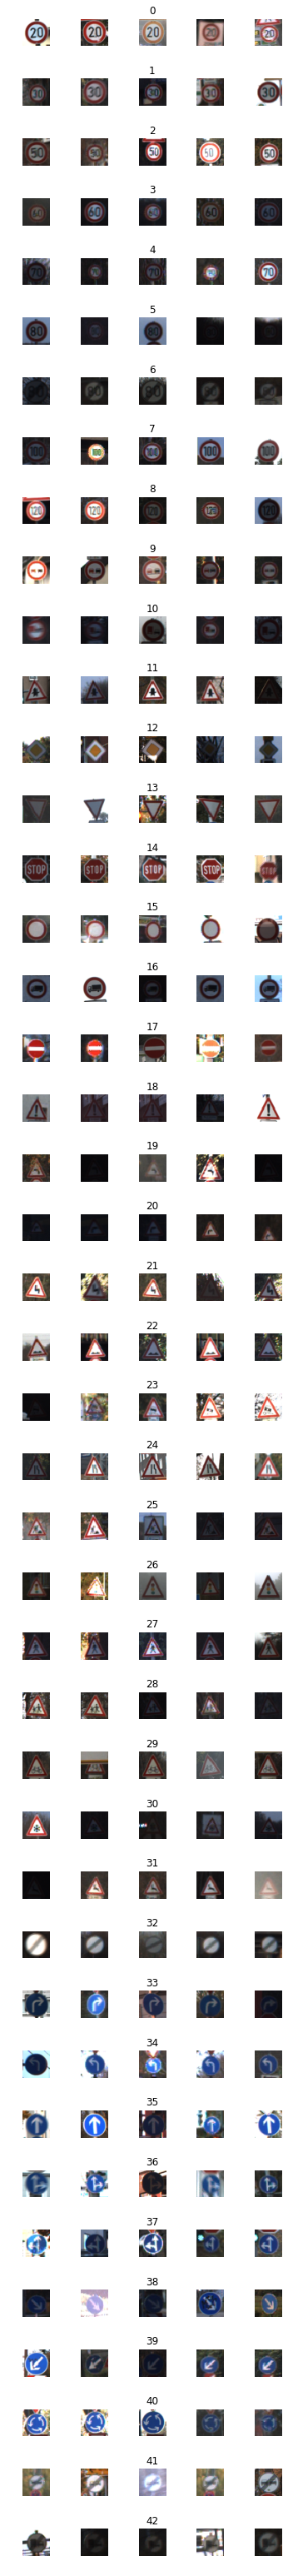

In [0]:
fig, axs = plt.subplots(nrows = num_of_classes, ncols= cols, figsize = (5, 43))
fig.tight_layout()

for i in range(cols):
  for j ,row in data.iterrows():
    x_selected = X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:], cmap = plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

In [0]:
print(len(num_of_samples))

43


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


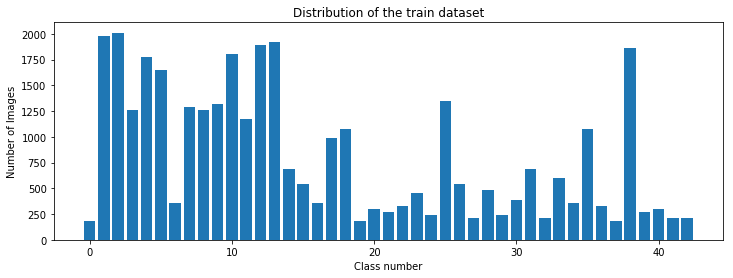

In [0]:
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")
plt.show()

(32, 32, 3)
36


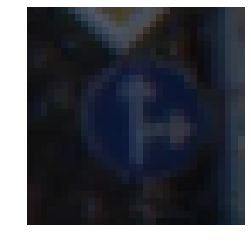

In [0]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


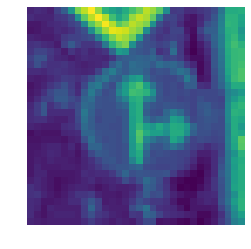

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
plt.show
print(img.shape)

(32, 32)


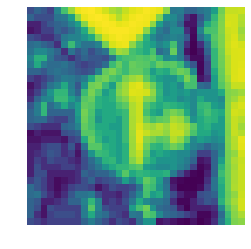

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
plt.show
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_valid = np.array(list(map(preprocessing, X_valid)))
X_test = np.array(list(map(preprocessing, X_test)))



(34799, 32, 32)


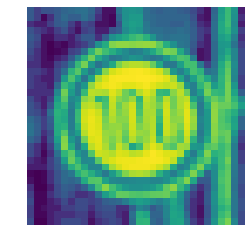

In [0]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


(15, 32, 32, 1)


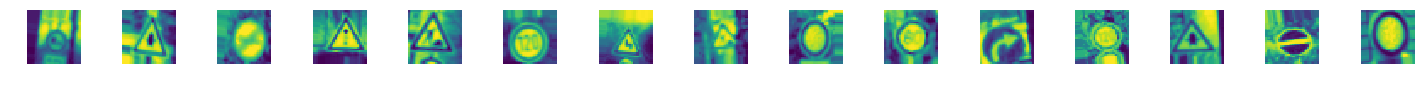

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(height_shift_range=0.1, 
                             width_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)

datagen.fit(X_train)

batches = datagen.flow(X_train,y_train, batch_size= 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize= (20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis("off")

print(X_batch.shape)

In [0]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)
y_test = to_categorical(y_test, 43)

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(30, (3,3), activation = 'relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_of_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [0]:
model = modified_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 30)         

In [0]:
#history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid), batch_size = 400, verbose = 1, shuffle = 1)
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = 2000, epochs = 10, validation_data = (X_valid, y_valid), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 211s 105ms/step - loss: 1.2233 - acc: 0.6367 - val_loss: 0.1310 - val_acc: 0.9621
Epoch 2/10
2000/2000 [==============================] - 209s 104ms/step - loss: 0.3929 - acc: 0.8756 - val_loss: 0.0601 - val_acc: 0.9839
Epoch 3/10
2000/2000 [==============================] - 212s 106ms/step - loss: 0.2654 - acc: 0.9168 - val_loss: 0.0377 - val_acc: 0.9918
Epoch 4/10
2000/2000 [==============================] - 222s 111ms/step - loss: 0.2121 - acc: 0.9331 - val_loss: 0.0453 - val_acc: 0.9848
Epoch 5/10
2000/2000 [==============================] - 225s 113ms/step - loss: 0.1832 - acc: 0.9441 - val_loss: 0.0250 - val_acc: 0.9923
Epoch 6/10
2000/2000 [==============================] - 230s 115ms/step - loss: 0.1634 - acc: 0.9499 - val_loss: 0.0247 - val_acc: 0.9918
Epoch 7/10
2000/2000 [==============================] - 234s 117ms/step - loss: 0.1479 - acc: 0.9551 - val_loss: 0.0201 - val_acc: 0.9941
Epoch 8/10
2000/2000 [============

Text(0.5, 0, 'epoch')

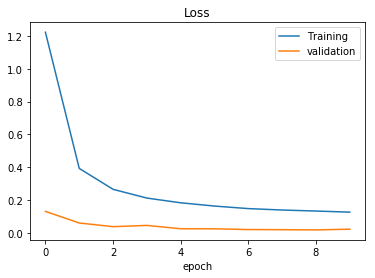

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'Epoch')

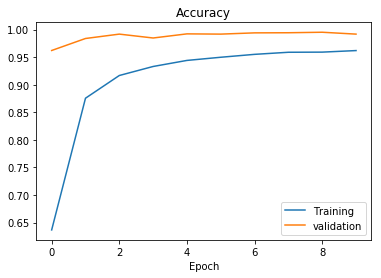

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [0]:
score = model.evaluate(X_test, y_test, verbose = 0)
print ("Test Score : ", score[0])
print ("Test Accuracy : ", score[1])

Test Score :  0.11155140571101636
Test Accuracy :  0.9676959620424423


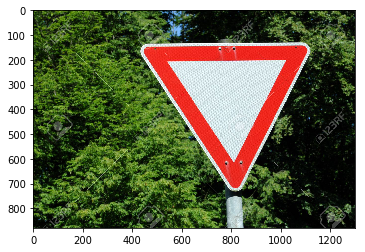

In [0]:
import requests
from PIL import Image 
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
#'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
#'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
#https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
#https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
r = requests.get(url, stream = True)
img = Image.open(r.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

(32, 32)


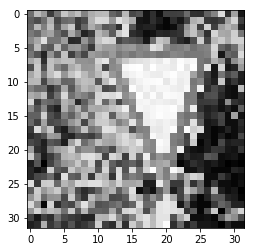

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1,32, 32, 1)

In [0]:
print("Prediction : " + str(model.predict_classes(img)))

Prediction : [13]
